## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Processing all the images

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
for i in range(classes):     
    path = os.path.join(cur_path,'train',str(i))     
    images = os.listdir(path)
    for a in images:
        try:             
            image = Image.open(path +'\\'+ a)             
            image = image.resize((30,30)) 
            # Resizing all images into 30*30                                                 
            image =np.array(image)             
            data.append(image)             
            labels.append(i)
        except Exception as e:
            print(e)


## Converting image datalist into NumPy array

In [3]:
data = np.array(data) 
labels = np.array(labels)
print(data.shape, labels.shape) 

(39209, 30, 30, 3) (39209,)


## Splitting the data into training and testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Converting labels into one hot encoding

In [5]:
y_train = to_categorical(y_train,43) 
y_test = to_categorical(y_test,43)

## Building the model

In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25)) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25)) 
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## Compilation of the model

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 110s 100ms/step - loss: 1.8908 - accuracy: 0.5261 - val_loss: 0.3933 - val_accuracy: 0.9056
Epoch 2/20
981/981 [==============================] - 78s 79ms/step - loss: 0.6813 - accuracy: 0.8001 - val_loss: 0.2298 - val_accuracy: 0.9424
Epoch 3/20
981/981 [==============================] - 72s 73ms/step - loss: 0.4618 - accuracy: 0.8626 - val_loss: 0.1593 - val_accuracy: 0.9596
Epoch 4/20
981/981 [==============================] - 72s 74ms/step - loss: 0.3722 - accuracy: 0.8901 - val_loss: 0.1228 - val_accuracy: 0.9656
Epoch 5/20
981/981 [==============================] - 73s 75ms/step - loss: 0.3281 - accuracy: 0.9058 - val_loss: 0.1195 - val_accuracy: 0.9690
Epoch 6/20
981/981 [==============================] - 83s 85ms/step - loss: 0.2959 - accuracy: 0.9136 - val_loss: 0.1082 - val_accuracy: 0.9695
Epoch 7/20
981/981 [==============================] - 72s 74ms/step - loss: 0.2987 - accuracy: 0.9160 - val_loss: 0.1019 - val_accurac

## Plotting the necessary graphs

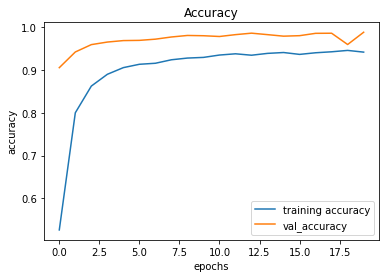

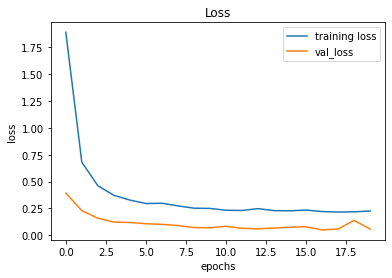

In [8]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## Testing the model

In [9]:
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test = np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)

# Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(labels, pred)

0.9566904196357878

## Saving the model

In [10]:
model.save("traffic_signal_classifier.h5")

In [1]:
import os
from keras.models import load_model
model = load_model("traffic_signal_classifier.h5")

In [2]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

Predicted traffic sign is:  Speed limit (30km/h)


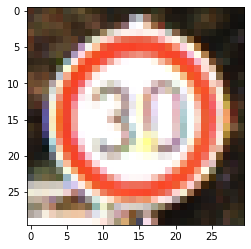

In [5]:
plot,prediction = test_on_img(r'E:\Traffic Sign Recognition\Test\00024.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()